In [97]:

#importing libraries I will be using for exploring, testing and model building
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import env
import os
import acquire
import prepare
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings("ignore")


In [98]:
# use get_telco_data function from acqure.py to get a telco data
telco=acquire.get_telco_data()


In [99]:
# take a look at the data
telco.head()

,Unnamed: 0,payment_type_id,internet_service_type_id,customer_id,contract_type_id,paperless_billing,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id.1,paperless_billing.1,monthly_charges,total_charges,churn,internet_service_type,payment_type
0,0,2,1,0002-ORFBO,2,Yes,Female,0,Yes,Yes,9,Yes,No,No,Yes,No,Yes,Yes,No,2,Yes,65.6,593.3,No,DSL,Mailed check
1,1,2,1,0003-MKNFE,1,No,Male,0,No,No,9,Yes,Yes,No,No,No,No,No,Yes,1,No,59.9,542.4,No,DSL,Mailed check
2,2,1,2,0004-TLHLJ,1,Yes,Male,0,No,No,4,Yes,No,No,No,Yes,No,No,No,1,Yes,73.9,280.85,Yes,Fiber optic,Electronic check
3,3,1,2,0011-IGKFF,1,Yes,Male,1,Yes,No,13,Yes,No,No,Yes,Yes,No,Yes,Yes,1,Yes,98.0,1237.85,Yes,Fiber optic,Electronic check
4,4,2,2,0013-EXCHZ,1,Yes,Female,1,Yes,No,3,Yes,No,No,No,No,Yes,Yes,No,1,Yes,83.9,267.4,Yes,Fiber optic,Mailed check


In [100]:
# checking the types of internet service data
telco.internet_service_type.value_counts()

Fiber optic    3096
DSL            2421
None           1526
Name: internet_service_type, dtype: int64

In [101]:
# prepare telco data by using prep_telco function from prepare.py
telco=prepare.prep_telco(telco)

In [102]:
#splitting my data into train, validate, test by using my_train_test_split function from prepare.py
train, validate, test=prepare.my_train_test_split(telco, 'churn')

In [103]:
# checking my train dataset I will be working with
train.head()

,customer_id,paperless_billing,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing.1,monthly_charges,total_charges,churn,internet_service_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,8319-QBEHW,Yes,Male,0,No,Yes,26,No,Yes,39.95,1023.75,No,DSL,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2479,3547-LQRIK,No,Female,0,Yes,No,47,Yes,No,26.90,1250.85,No,None,1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
5889,8280-MQRQN,Yes,Female,0,No,No,1,Yes,Yes,50.45,50.45,Yes,DSL,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6087,8626-PTQGE,Yes,Male,0,No,No,69,No,Yes,60.05,4176.7,No,DSL,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
785,1142-IHLOO,No,Female,0,No,No,51,Yes,No,87.55,4475.9,No,Fiber optic,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0


In [104]:
#removing the space from data in total_charges and monthly_charges columns
train['total_charges']=train['total_charges'].replace(' ', '')
train['monthly_charges']=train['monthly_charges'].replace(' ', '')

In [105]:
#converting total_charges and mongthly charges columns to numeric data
train['total_charges']=pd.to_numeric(train['total_charges'])
train['monthly_charges']=pd.to_numeric(train['monthly_charges'])

In [106]:
#getting overall description of the data
train.describe(include='all')

,customer_id,paperless_billing,gender,senior_citizen,partner,dependents,tenure,phone_service,paperless_billing.1,monthly_charges,total_charges,churn,internet_service_type,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
count,4225,4225,4225,4225.000000,4225,4225,4225.000000,4225,4225,4225.000000,4216.000000,4225,4225,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000
unique,4225,2,2,NaN,2,2,NaN,2,2,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,8319-QBEHW,Yes,Male,NaN,No,No,NaN,Yes,Yes,NaN,NaN,No,Fiber optic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,2509,2149,NaN,2161,2931,NaN,3832,2509,NaN,NaN,3104,1855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,0.161893,NaN,NaN,32.500828,NaN,NaN,65.056142,2303.420292,NaN,NaN,0.491361,0.488521,0.306272,0.906982,0.593846,0.265325,0.093018,0.427692,0.218462,0.291598,0.218462,0.350059,0.218462,0.351006,0.218462,0.289467,0.218462,0.392189,0.218462,0.395503,0.439053,0.218462,0.217515,0.336805,0.224852
std,NaN,NaN,NaN,0.368397,NaN,NaN,24.532563,NaN,NaN,30.268493,2271.540183,NaN,NaN,0.499985,0.499927,0.460999,0.290492,0.491172,0.441559,0.290492,0.494803,0.413251,0.454552,0.413251,0.477045,0.413251,0.477341,0.413251,0.453569,0.413251,0.488296,0.413251,0.489016,0.496330,0.413251,0.412604,0.472673,0.417534
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,18.250000,18.850000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,35.650000,413.550000,NaN,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,70.400000,1406.325000,NaN,NaN,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,90.150000,3871.775000,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000


In [107]:
#value counting churn
train.churn.value_counts()


No     3104
Yes    1121
Name: churn, dtype: int64

<AxesSubplot:>

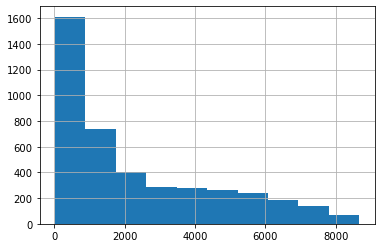

In [108]:
# taking a look at total_charges column

train.total_charges.hist()

<AxesSubplot:>

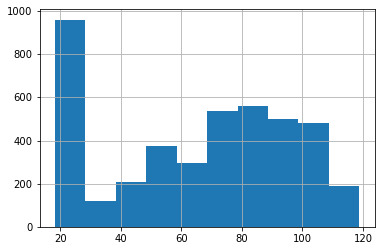

In [109]:
#plotting a histogram of monthly_charges
train.monthly_charges.hist()

<AxesSubplot:xlabel='churn', ylabel='count'>

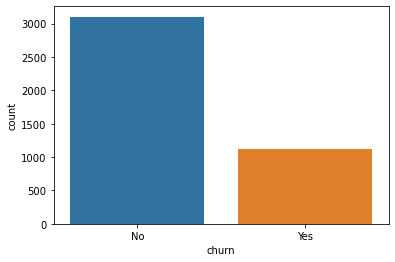

In [110]:
#ploting a churn column to see the overall rate
sns.countplot('churn', data=train)

In [111]:
#writing a function which plots a histogram of all columns with datatype not object to check out the distribution
def num_distributions(train):
    for col in train.columns:
        if train[col].dtype != 'object':
            plt.hist(train[col])
            plt.title(f'Distribution of {col}')
            plt.show()

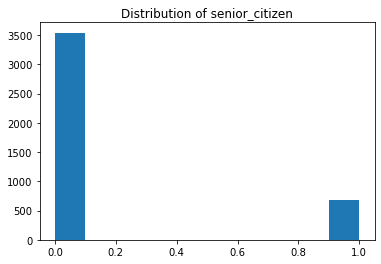

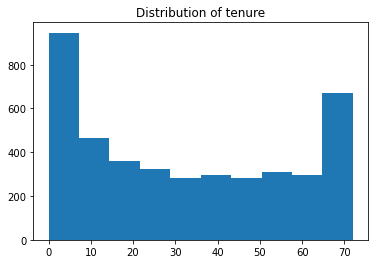

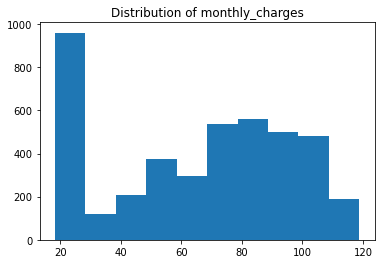

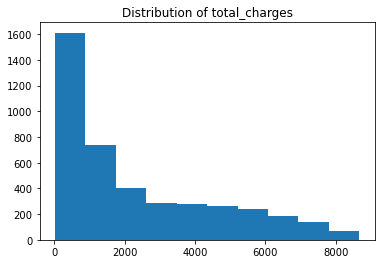

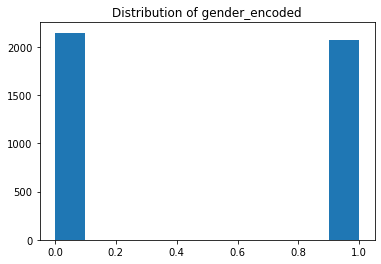

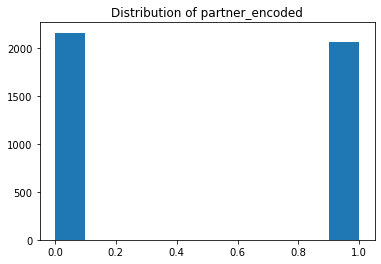

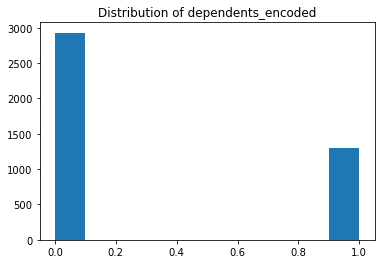

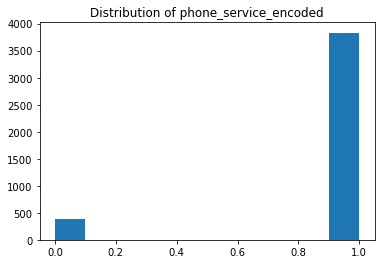

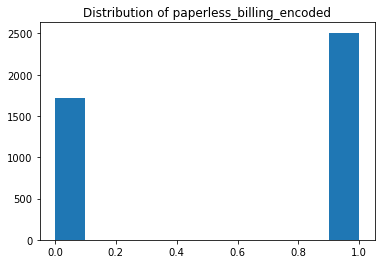

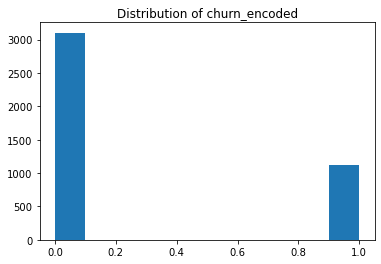

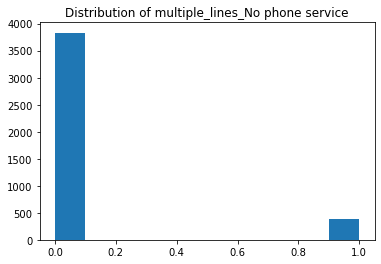

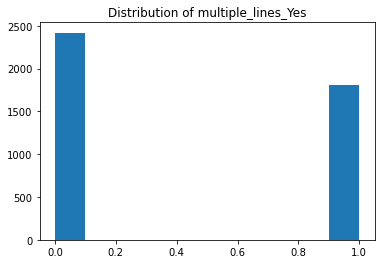

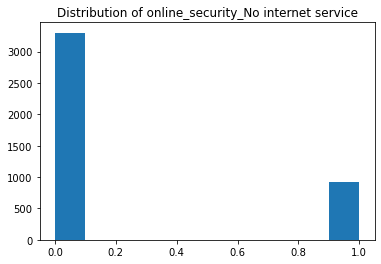

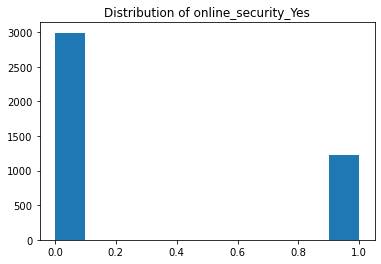

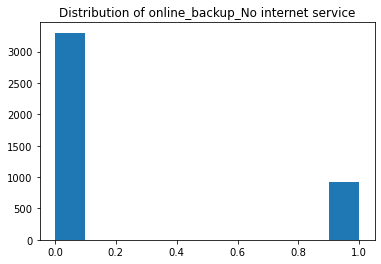

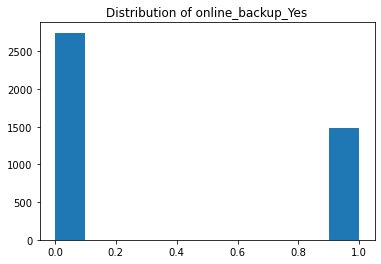

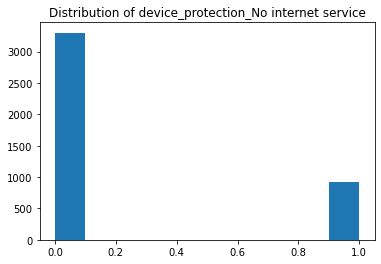

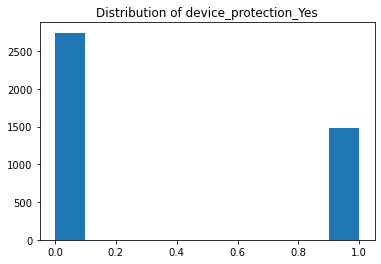

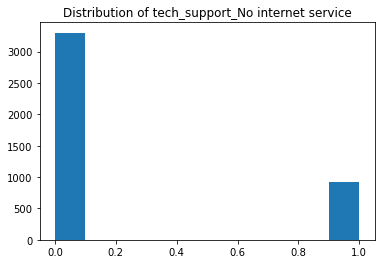

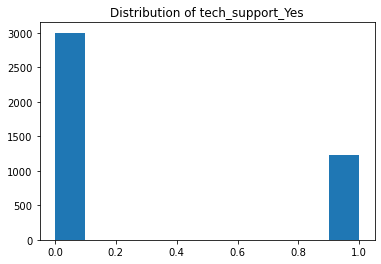

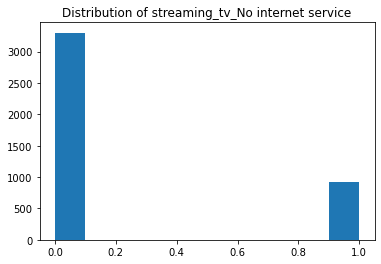

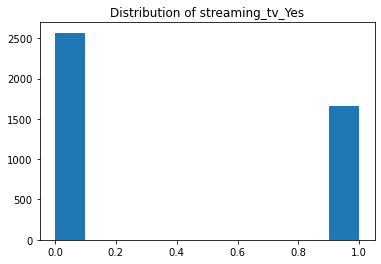

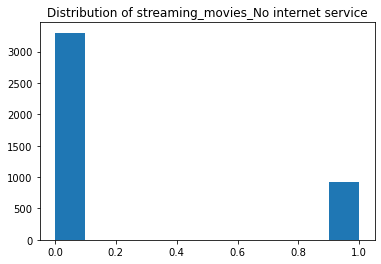

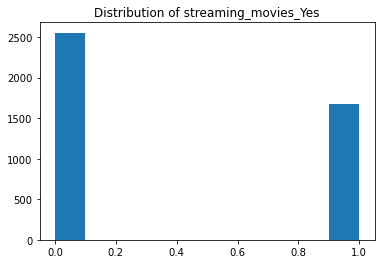

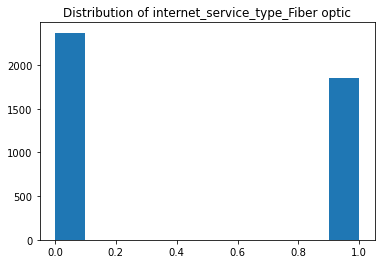

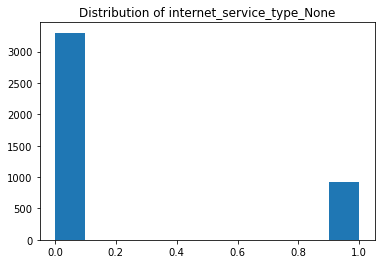

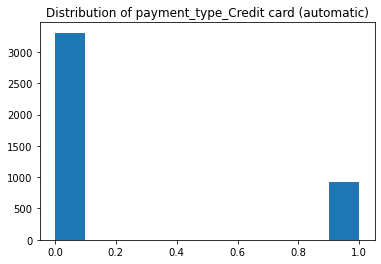

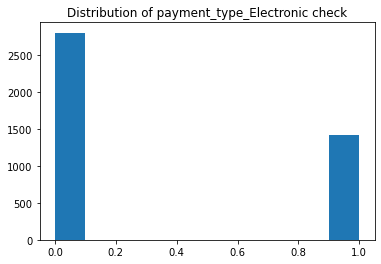

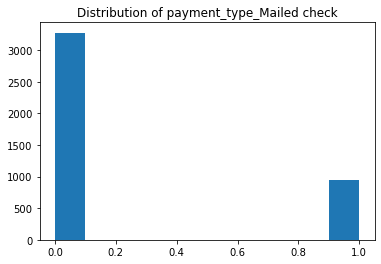

In [112]:
num_distributions(train)

In [113]:
#creating a separate dataframe of churned customers
df_churn=train[train['churn']=='Yes']


In [114]:
#creating a dataframe of not churned customers
df_no_churn=train[train['churn']=='No']

In [115]:
#printing out monthly charges of churend and not churned customers
df_churn.monthly_charges.mean(), df_no_churn.monthly_charges.mean()

(74.5475914362176, 61.62833440721646)

In [116]:
#checking out the columns of customers with dependents
df_churn[df_churn['dependents']=='Yes'].mean()

senior_citizen                              0.078818
tenure                                     24.709360
monthly_charges                            74.980542
total_charges                            2109.143350
gender_encoded                              0.487685
partner_encoded                             0.768473
dependents_encoded                          1.000000
phone_service_encoded                       0.940887
paperless_billing_encoded                   0.665025
churn_encoded                               1.000000
multiple_lines_No phone service             0.059113
multiple_lines_Yes                          0.453202
online_security_No internet service         0.083744
online_security_Yes                         0.241379
online_backup_No internet service           0.083744
online_backup_Yes                           0.300493
device_protection_No internet service       0.083744
device_protection_Yes                       0.379310
tech_support_No internet service            0.

In [117]:
#putting in dataframe
col_1=pd.DataFrame(df_churn.mean())
col_1.rename({0:'churn'}, axis=1, inplace=True)


In [118]:
col_1.head()

,churn
senior_citizen,0.247101
tenure,18.282783
monthly_charges,74.547591
total_charges,1572.352096
gender_encoded,0.484389


In [119]:

#putting in dataframe and concatinating to compare and see them side by side
col_2=pd.DataFrame(df_no_churn.mean())
col_2.rename({0:'no_churn'}, axis=1, inplace=True)
diff_df=pd.concat([col_1, col_2], axis=1)

diff=diff_df.churn-diff_df.no_churn
diff_df=pd.concat([diff_df, diff], axis=True)
diff_df

diff_df.rename({0:'difference'}, axis=1, inplace=True)
diff_df.sort_values('difference')

,churn,no_churn,difference
total_charges,1572.352096,2568.211066,-995.858970
tenure,18.282783,37.635631,-19.352848
online_backup_No internet service,0.066012,0.273518,-0.207506
internet_service_type_None,0.066012,0.273518,-0.207506
streaming_movies_No internet service,0.066012,0.273518,-0.207506
streaming_tv_No internet service,0.066012,0.273518,-0.207506
tech_support_No internet service,0.066012,0.273518,-0.207506
device_protection_No internet service,0.066012,0.273518,-0.207506
online_security_No internet service,0.066012,0.273518,-0.207506
partner_encoded,0.355932,0.536405,-0.180472


<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

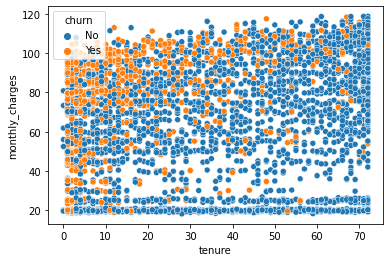

In [120]:
#making scatterplot of of churn against monthly charges and tenure

sns.scatterplot(data=train, y='monthly_charges', x='tenure', hue='churn')

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

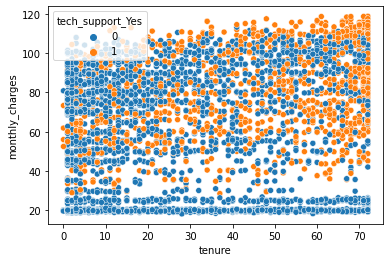

In [121]:
#making a scatterplot of tech_support against monthly charges and tenure
sns.scatterplot(data=train, y='monthly_charges', x='tenure', hue='tech_support_Yes')

<AxesSubplot:xlabel='tenure', ylabel='monthly_charges'>

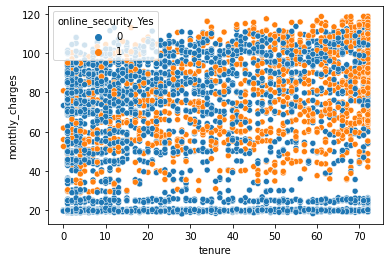

In [122]:
#making a scatterplot of tech_support against monthly charges and tenure
sns.scatterplot(data=train, y='monthly_charges', x='tenure', hue='online_security_Yes')

In [123]:
#checking the internet service types
train.internet_service_type.value_counts()

Fiber optic    1855
DSL            1447
None            923
Name: internet_service_type, dtype: int64

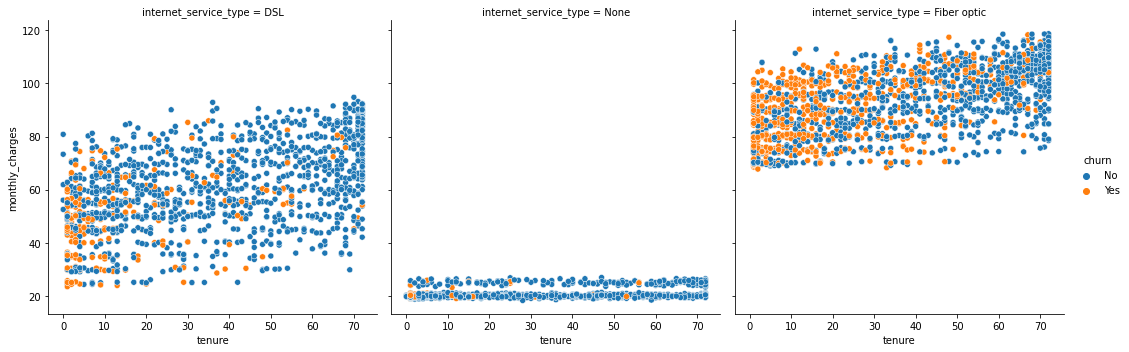

In [124]:
#making a scatterplot of internet service type against monthly charges and tenure

sns.relplot(data=train, y='monthly_charges', x='tenure', hue='churn', col='internet_service_type' )

In [127]:
# dropping columns I dont need for modeling from all train validate and test
train=train.drop(columns=['total_charges','paperless_billing','gender', 'partner', 'dependents','phone_service', 'phone_service', 'paperless_billing.1', 'churn'])
validate=validate.drop(columns=[ 'total_charges','paperless_billing','gender', 'partner', 'dependents','phone_service', 'phone_service', 'paperless_billing.1', 'churn'])
test=test.drop(columns=['total_charges', 'paperless_billing','gender', 'partner', 'dependents','phone_service', 'phone_service', 'paperless_billing.1', 'churn'])

In [129]:
#dropping internet service type column from my train data
train=train.drop(columns='internet_service_type')
validate=validate.drop(columns='internet_service_type')
test=test.drop(columns='internet_service_type')

In [189]:
'''EXPLORE SUMMARY
The factors that affect the churn rate as I see so far are tech support, online security, monthly charges and and factor of tenure in providing 
additional servics. Fiber optic customers are the most who churn and chrged the highest. I will be testing my hypothesis on relation of churn rate with 
online security, monthly charges and tech support'''

'EXPLORE SUMMARY\nThe factors that affect the churn rate as I see so far are tech support, online security, monthly charges and and factor of tenure in providing \nadditional servics. Fiber optic customers are the most who churn and chrged the highest. I will be testing my hypothesis on relation of churn rate with \nonline security, monthly charges and tech support'

In [131]:
'''HYPOTHESIS TESTING'''
#printing out some needed columns for my tests

churned=train.churn_encoded
yes_churn=train.churn_encoded==1
no_churn=train.churn_encoded==0
churned_charges=train[train.churn_encoded==1].monthly_charges
no_churn_charges=train[train.churn_encoded==0].monthly_charges
all_customers_charges=train.monthly_charges.mean()
online_security=train.online_security_Yes==1
no_online_security=train.online_security_Yes==0
tech_support=train.tech_support_Yes==1
no_tech_support=train.tech_support_Yes==0




In [132]:
#Ho: There is not correlation between churn and no_online_security
#Ha: There is a correlation between churn and no_online_security
# my alpha is set at 0.05


r, p=stats.pearsonr(yes_churn, no_online_security )
r, p

# my p-value is smaller than my alpha. Ho is rejected

(0.1626329707476021, 1.9640197299483008e-26)

In [133]:
#Ho: There is no correlation between churn and no_tech_support
#Ha: There is a correlation between churn and no_tech_support
# my alpha is set at 0.05
r, p=stats.pearsonr(yes_churn, no_tech_support)
r, p

# my p-value is smaller than my alpha. Ho is rejected

(0.1530702636251719, 1.4395902682395768e-23)

In [134]:
#Ho: Churned customer charges are not higher than overall customer charges
#Ha: Churned custoemer charges are higher than overall customer charges

t, p=stats.ttest_1samp(churned_charges, all_customers_charges)
t, p

# my p-value is smaller than my alpha. Ho is rejected


(12.65294490503547, 2.1481973182268904e-34)

In [135]:
#Ho: Churn not dependent of tech support
#Ha: Churn is dependent of tech support
ctab=pd.crosstab(no_tech_support, yes_churn)
chi2, p, degf, expected=stats.chi2_contingency(ctab)
chi2, p, degf, expected

# my p-value is smaller than my alpha. Ho is rejected


(98.23088931064383,
 3.7233642021021574e-23,
 1,
 array([[ 898.50698225,  324.49301775],
        [2205.49301775,  796.50698225]]))

In [188]:
#making my baseline predicton. my best model has to be more accurate than my baseline predicton
baseline_predicton=(train.churn_encoded==0).mean()
baseline_predicton

0.7346745562130178

In [136]:
'''MODELING'''

'''DecisionTreeClassifier'''

#checking out my train data and making sure it is in ready to model shape

train.head()


,customer_id,senior_citizen,tenure,monthly_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
5911,8319-QBEHW,0,26,39.95,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
2479,3547-LQRIK,0,47,26.90,1,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,0
5889,8280-MQRQN,0,1,50.45,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
6087,8626-PTQGE,0,69,60.05,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0
785,1142-IHLOO,0,51,87.55,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0


In [137]:
#checking out my validate data and making sure it is in ready to model shape
validate.head()


,customer_id,senior_citizen,tenure,monthly_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3554,5035-PGZXH,0,56,106.80,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,1,0
2063,2969-VAPYH,0,67,60.50,1,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0
1737,2528-HFYZX,1,17,76.45,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
5894,8292-ITGYJ,0,45,24.65,1,1,1,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,0
209,0324-BRPCJ,1,68,100.20,1,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0


In [138]:
#checking out my test data and making sure it is in ready to model shape
test.head()

,customer_id,senior_citizen,tenure,monthly_charges,gender_encoded,partner_encoded,dependents_encoded,phone_service_encoded,paperless_billing_encoded,churn_encoded,multiple_lines_No phone service,multiple_lines_Yes,online_security_No internet service,online_security_Yes,online_backup_No internet service,online_backup_Yes,device_protection_No internet service,device_protection_Yes,tech_support_No internet service,tech_support_Yes,streaming_tv_No internet service,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
3160,4531-AUZNK,0,51,95.15,1,1,1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1
1577,2296-DKZFP,0,65,71.00,1,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
6823,9692-TUSXH,0,18,96.05,1,0,0,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0
3615,5129-JLPIS,0,25,105.50,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,1,0,0,1,0
882,1273-MTETI,1,4,88.85,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0


In [139]:
#creating my X_train data by dropping my target
X_train=train.drop(columns='churn_encoded')
#creating my y_train data which is my target I dropped from my X_train
y_train=train.churn_encoded
#creating my X_validate data by dropping my target
X_validate=validate.drop(columns='churn_encoded')
#creating my y_validate data which is my target I dropped from my X_train
y_validate=validate.churn_encoded
#creating my X_test data by dropping my target
X_test=test.drop(columns='churn_encoded')
#creating my y_test data which is my target I dropped from my X_train
y_test=test.churn_encoded

In [140]:
#creating a customer_id for later prediction.csv file before I drop it

customer_id=pd.DataFrame(test.customer_id)

In [141]:
#Dropping the customer id column before I start making and testing my models
X_train=X_train.drop(columns='customer_id')
X_validate=X_validate.drop(columns='customer_id')
X_test=X_test.drop(columns='customer_id')

In [142]:
#writing a function which creates a desiciontree model in depths from 2 to 7 so I dont have to write it several times and could pick the most accurate one

models = []
model_scores = []
for i in range(2,8):
    model = DecisionTreeClassifier(max_depth=i)
    model.fit(X_train, y_train)
    models.append(model)
    model_scores.append(model.score(X_train, y_train))


In [143]:
#printing out my models and their scores to see which one is the most accurate
models, model_scores

([DecisionTreeClassifier(max_depth=2),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=4),
  DecisionTreeClassifier(max_depth=5),
  DecisionTreeClassifier(max_depth=6),
  DecisionTreeClassifier(max_depth=7)],
 [0.7869822485207101,
  0.7869822485207101,
  0.7917159763313609,
  0.8035502958579882,
  0.8089940828402367,
  0.8220118343195266])

In [144]:
#the last model turns out to be the most accurate one
cls_model=models[5]

In [145]:
#making predictions
y_pred=cls_model.predict(X_train)


In [146]:
#printing out the confusion matrix
confusion_matrix(y_train, y_pred)

array([[2776,  328],
       [ 424,  697]])

In [147]:
#printing out the classification report
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.867500,0.680000,0.822012,0.773750,0.817751
recall,0.894330,0.621766,0.822012,0.758048,0.822012
f1-score,0.880711,0.649581,0.822012,0.765146,0.819386
support,3104.000000,1121.000000,0.822012,4225.000000,4225.000000


In [148]:
#validating my model and making sure it does not overfit
cls_model.score(X_validate, y_validate)

0.7934705464868701

In [149]:
#making predictions with my validate data 
cls_y_val_pred=cls_model.predict(X_validate)

In [150]:
#printing out the confusion matrix
confusion_matrix(y_validate, cls_y_val_pred)

array([[891, 144],
       [147, 227]])

In [151]:
#printing out the classification report of validate date
decision_tree=pd.DataFrame(classification_report(y_validate, cls_y_val_pred, output_dict=True))
decision_tree

,0,1,accuracy,macro avg,weighted avg
precision,0.858382,0.611860,0.793471,0.735121,0.792946
recall,0.860870,0.606952,0.793471,0.733911,0.793471
f1-score,0.859624,0.609396,0.793471,0.734510,0.793204
support,1035.000000,374.000000,0.793471,1409.000000,1409.000000


In [152]:
'''RandomForestClassifier'''
#writing a function which creates a randomforest models in depth from 2 to 7


models=[]
model_scores=[]
for i in range (2, 8):
    model=RandomForestClassifier(max_depth=i)
    model.fit(X_train, y_train)
    models.append(model)
    model_scores.append(model.score(X_train, y_train))


In [153]:
#printing out the models and their scores

models, model_scores

([RandomForestClassifier(max_depth=2),
  RandomForestClassifier(max_depth=3),
  RandomForestClassifier(max_depth=4),
  RandomForestClassifier(max_depth=5),
  RandomForestClassifier(max_depth=6),
  RandomForestClassifier(max_depth=7)],
 [0.7346745562130178,
  0.7765680473372781,
  0.7874556213017752,
  0.7943195266272189,
  0.8021301775147929,
  0.8163313609467455])

In [154]:
#the last model turns out to be the most accurate
rf_model=models[5]

In [155]:
#making predictions with my selected model
y_pred1=rf_model.predict(X_train)

In [156]:
#printing out the confusion matrix
confusion_matrix(y_train, y_pred)

array([[2776,  328],
       [ 424,  697]])

In [157]:
#printing out the classification report
pd.DataFrame(classification_report(y_train, y_pred, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.867500,0.680000,0.822012,0.773750,0.817751
recall,0.894330,0.621766,0.822012,0.758048,0.822012
f1-score,0.880711,0.649581,0.822012,0.765146,0.819386
support,3104.000000,1121.000000,0.822012,4225.000000,4225.000000


In [158]:
#making predictions with my validate data and making sure there is no overfit
rf_y_val_pred=rf_model.predict(X_validate)

In [159]:
#printing out the confusion matrix
confusion_matrix(y_validate,rf_y_val_pred)

array([[961,  74],
       [202, 172]])

In [160]:
#printing out the classification report
random_forest=pd.DataFrame(classification_report(y_validate, rf_y_val_pred, output_dict=True))
random_forest

,0,1,accuracy,macro avg,weighted avg
precision,0.826311,0.699187,0.804116,0.762749,0.792568
recall,0.928502,0.459893,0.804116,0.694198,0.804116
f1-score,0.874431,0.554839,0.804116,0.714635,0.789600
support,1035.000000,374.000000,0.804116,1409.000000,1409.000000


In [161]:
'''KNeighborsClassifier'''

#writing a function that creates a kneighbors model in depths from 2 to 7

models=[]
model_scores=[]
for i in range(2,8):
    model=KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    models.append(model)
    model_scores.append(model.score(X_train, y_train))

In [162]:
#printing out the models and scores
pd.DataFrame(models,model_scores)

,0
0.867219,KNeighborsClassifier(n_neighbors=2)
0.858462,KNeighborsClassifier(n_neighbors=3)
0.842604,KNeighborsClassifier(n_neighbors=4)
0.829822,KNeighborsClassifier()
0.834083,KNeighborsClassifier(n_neighbors=6)
0.823432,KNeighborsClassifier(n_neighbors=7)


In [163]:
#the first model turns out to be the most accurate
knn_model=models[0]

In [164]:
#making predictions with that model
y_pred2=knn_model.predict(X_train)

In [165]:
#printing out the confusion matrix
confusion_matrix(y_train, y_pred2)

array([[3103,    1],
       [ 560,  561]])

In [166]:
#printing out the classification report
pd.DataFrame(classification_report(y_train, y_pred2, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.847120,0.998221,0.867219,0.922670,0.887211
recall,0.999678,0.500446,0.867219,0.750062,0.867219
f1-score,0.917098,0.666667,0.867219,0.791882,0.850652
support,3104.000000,1121.000000,0.867219,4225.000000,4225.000000


In [167]:
#making prediction with validate data and making sure there is no overfit
knn_y_valid_pred=knn_model.predict(X_validate)

In [168]:
#printing out the confusion matrix
confusion_matrix(y_validate, knn_y_valid_pred)

array([[947,  88],
       [262, 112]])

In [169]:
#printing out the classificaton report
k_neighbor=pd.DataFrame(classification_report(y_validate, knn_y_valid_pred, output_dict=True))
k_neighbor

,0,1,accuracy,macro avg,weighted avg
precision,0.783292,0.560000,0.751597,0.671646,0.724022
recall,0.914976,0.299465,0.751597,0.607221,0.751597
f1-score,0.844029,0.390244,0.751597,0.617136,0.723578
support,1035.000000,374.000000,0.751597,1409.000000,1409.000000


In [170]:
#printing out all the selected models to see which one is the most accurate. the goal is to select the most accurtae model and conduct a test on it
decision_tree, random_forest, k_neighbor

(                     0           1  accuracy    macro avg  weighted avg
 precision     0.858382    0.611860  0.793471     0.735121      0.792946
 recall        0.860870    0.606952  0.793471     0.733911      0.793471
 f1-score      0.859624    0.609396  0.793471     0.734510      0.793204
 support    1035.000000  374.000000  0.793471  1409.000000   1409.000000,
                      0           1  accuracy    macro avg  weighted avg
 precision     0.826311    0.699187  0.804116     0.762749      0.792568
 recall        0.928502    0.459893  0.804116     0.694198      0.804116
 f1-score      0.874431    0.554839  0.804116     0.714635      0.789600
 support    1035.000000  374.000000  0.804116  1409.000000   1409.000000,
                      0           1  accuracy    macro avg  weighted avg
 precision     0.783292    0.560000  0.751597     0.671646      0.724022
 recall        0.914976    0.299465  0.751597     0.607221      0.751597
 f1-score      0.844029    0.390244  0.751597    

In [171]:
#random forest model turn out to be the most accurate one. I am testing this model
test_acc=pd.DataFrame(rf_model.predict(X_test))
test_acc

,0
0,0
1,0
2,1
3,0
4,1
...,...
1404,0
1405,1
1406,0
1407,0


In [172]:
#predicting a probobility of churn with my selected model
y_pred_prob=pd.DataFrame(rf_model.predict_proba(X_test))

y_pred

array([0, 0, 1, ..., 1, 0, 0])

In [173]:
#printing out the confustion matrix
confusion_matrix(y_test, test_acc)

array([[955,  80],
       [191, 183]])

In [174]:
#printing out the classification report
pd.DataFrame(classification_report(y_test, test_acc, output_dict=True))

,0,1,accuracy,macro avg,weighted avg
precision,0.833333,0.695817,0.807665,0.764575,0.796832
recall,0.922705,0.489305,0.807665,0.706005,0.807665
f1-score,0.875745,0.574568,0.807665,0.725157,0.795802
support,1035.000000,374.000000,0.807665,1409.000000,1409.000000


In [175]:
#reseting the index of customer_id table
customer_id=customer_id.reset_index()
del customer_id['index']
customer_id

,customer_id
0,4531-AUZNK
1,2296-DKZFP
2,9692-TUSXH
3,5129-JLPIS
4,1273-MTETI
...,...
1404,1597-FZREH
1405,9117-SHLZX
1406,8441-SHIPE
1407,3511-BFTJW


In [176]:
#reseting the index of customer_id table
customer_id=customer_id.reset_index()
del customer_id['index']
customer_id

,customer_id
0,4531-AUZNK
1,2296-DKZFP
2,9692-TUSXH
3,5129-JLPIS
4,1273-MTETI
...,...
1404,1597-FZREH
1405,9117-SHLZX
1406,8441-SHIPE
1407,3511-BFTJW


In [177]:
#reanaming and concatinating my prediction, probobility and customer_id
test_acc=test_acc.rename(columns={0:'predicton'})

final_predictions=pd.concat([test_acc, y_pred_prob, customer_id ], axis=1)
final_predictions=final_predictions.rename(columns={0:'no_churn', 1:'churn'})
final_predictions=final_predictions.drop(columns='no_churn')

In [178]:
#renaming my churn column to probobility
final_predictions=final_predictions.rename(columns={'churn':'probobility'})
final_predictions

,predicton,probobility,customer_id
0,0,0.167619,4531-AUZNK
1,0,0.064761,2296-DKZFP
2,1,0.518828,9692-TUSXH
3,0,0.385586,5129-JLPIS
4,1,0.743769,1273-MTETI
...,...,...,...
1404,0,0.418339,1597-FZREH
1405,1,0.512466,9117-SHLZX
1406,0,0.037891,8441-SHIPE
1407,0,0.080045,3511-BFTJW


In [179]:
#converting my final_predictions to to csv 
final_predictions.to_csv('Predictions.csv')

In [180]:
'''CONCLUSION
My findings: The biggest factors that have influence on customers decision on chunrning are monthly_charges and lack of additional services like device protection and online security.
Additional services are offered only to those customer who stay with the company for more than 24 month whereas bulk chunk of the customers tend to leave 
after 24 months. Customers who use fiber optic type of internet tend to leave more often and in the first 10 months which indicates their unsatisfaction with eithor servise or price 
My reccommendations: Consider promotions or discounts to fiber optic customers starting from the firts month. Offer additonal servises like device protection and online security 
to all customers regardless of their tenure. If additional services are offered to those who stay long enough the company loses too many customers

Next step:
Further exploration and analysis required on using no internet type of services data. Interesting correlations might be found on further analysis of those data'''

'CONCLUSION\nMy findings: The biggest factors that have influence on customers decision on chunrning are monthly_charges and lack of additional services like device protection and online security.\nAdditional services are offered only to those customer who stay with the company for more than 24 month whereas bulk chunk of the customers tend to leave \nafter 24 months. Customers who use fiber optic type of internet tend to leave more often and in the first 10 months which indicates their unsatisfaction with eithor servise or price \nMy reccommendations: Consider promotions or discounts to fiber optic customers starting from the firts month. Offer additonal servises like device protection and online security \nto all customers regardless of their tenure. If additional services are offered to those who stay long enough the company loses too many customers\n\nNext step:\nFurther exploration and analysis required on using no internet type of services data. Interesting correlations might be 